In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import pybboxes as pbx

plt.rcParams.update({'font.size': 16})

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils_data")

from utils_data.preprocessing import RtsdDataset


In [3]:
input_path = './../input/rtsd'
output_path = './../datasets/rtsd'
rtsd = RtsdDataset(input_path=input_path, output_path=output_path)

In [4]:
train_labels_df = rtsd.parse_input_annotations(rtsd.train_annotations_path)
val_labels_df = rtsd.parse_input_annotations(rtsd.val_annotations_path)

In [5]:
print(train_labels_df.shape)
print(val_labels_df.shape)

(95492, 11)
(8866, 11)


In [6]:
train_labels_df.head()

,id,image_id,category_id,area,bbox,iscrowd,label,img_name_path,img_name,width,height
0,0,0,1,324,"[649, 376, 18, 18]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_33.jpg,autosave01_02_2012_09_13_33.jpg,1280,720
1,1,1,1,420,"[671, 356, 20, 21]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_34.jpg,autosave01_02_2012_09_13_34.jpg,1280,720
2,2,2,1,702,"[711, 332, 27, 26]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_35.jpg,autosave01_02_2012_09_13_35.jpg,1280,720
3,3,3,1,1332,"[764, 290, 37, 36]",0,2_1,rtsd-frames/autosave01_02_2012_09_13_36.jpg,autosave01_02_2012_09_13_36.jpg,1280,720
4,4,3,2,289,"[684, 384, 17, 17]",0,1_23,rtsd-frames/autosave01_02_2012_09_13_36.jpg,autosave01_02_2012_09_13_36.jpg,1280,720


In [7]:
train_labels_df['iscrowd'].value_counts()

0    95492
Name: iscrowd, dtype: int64

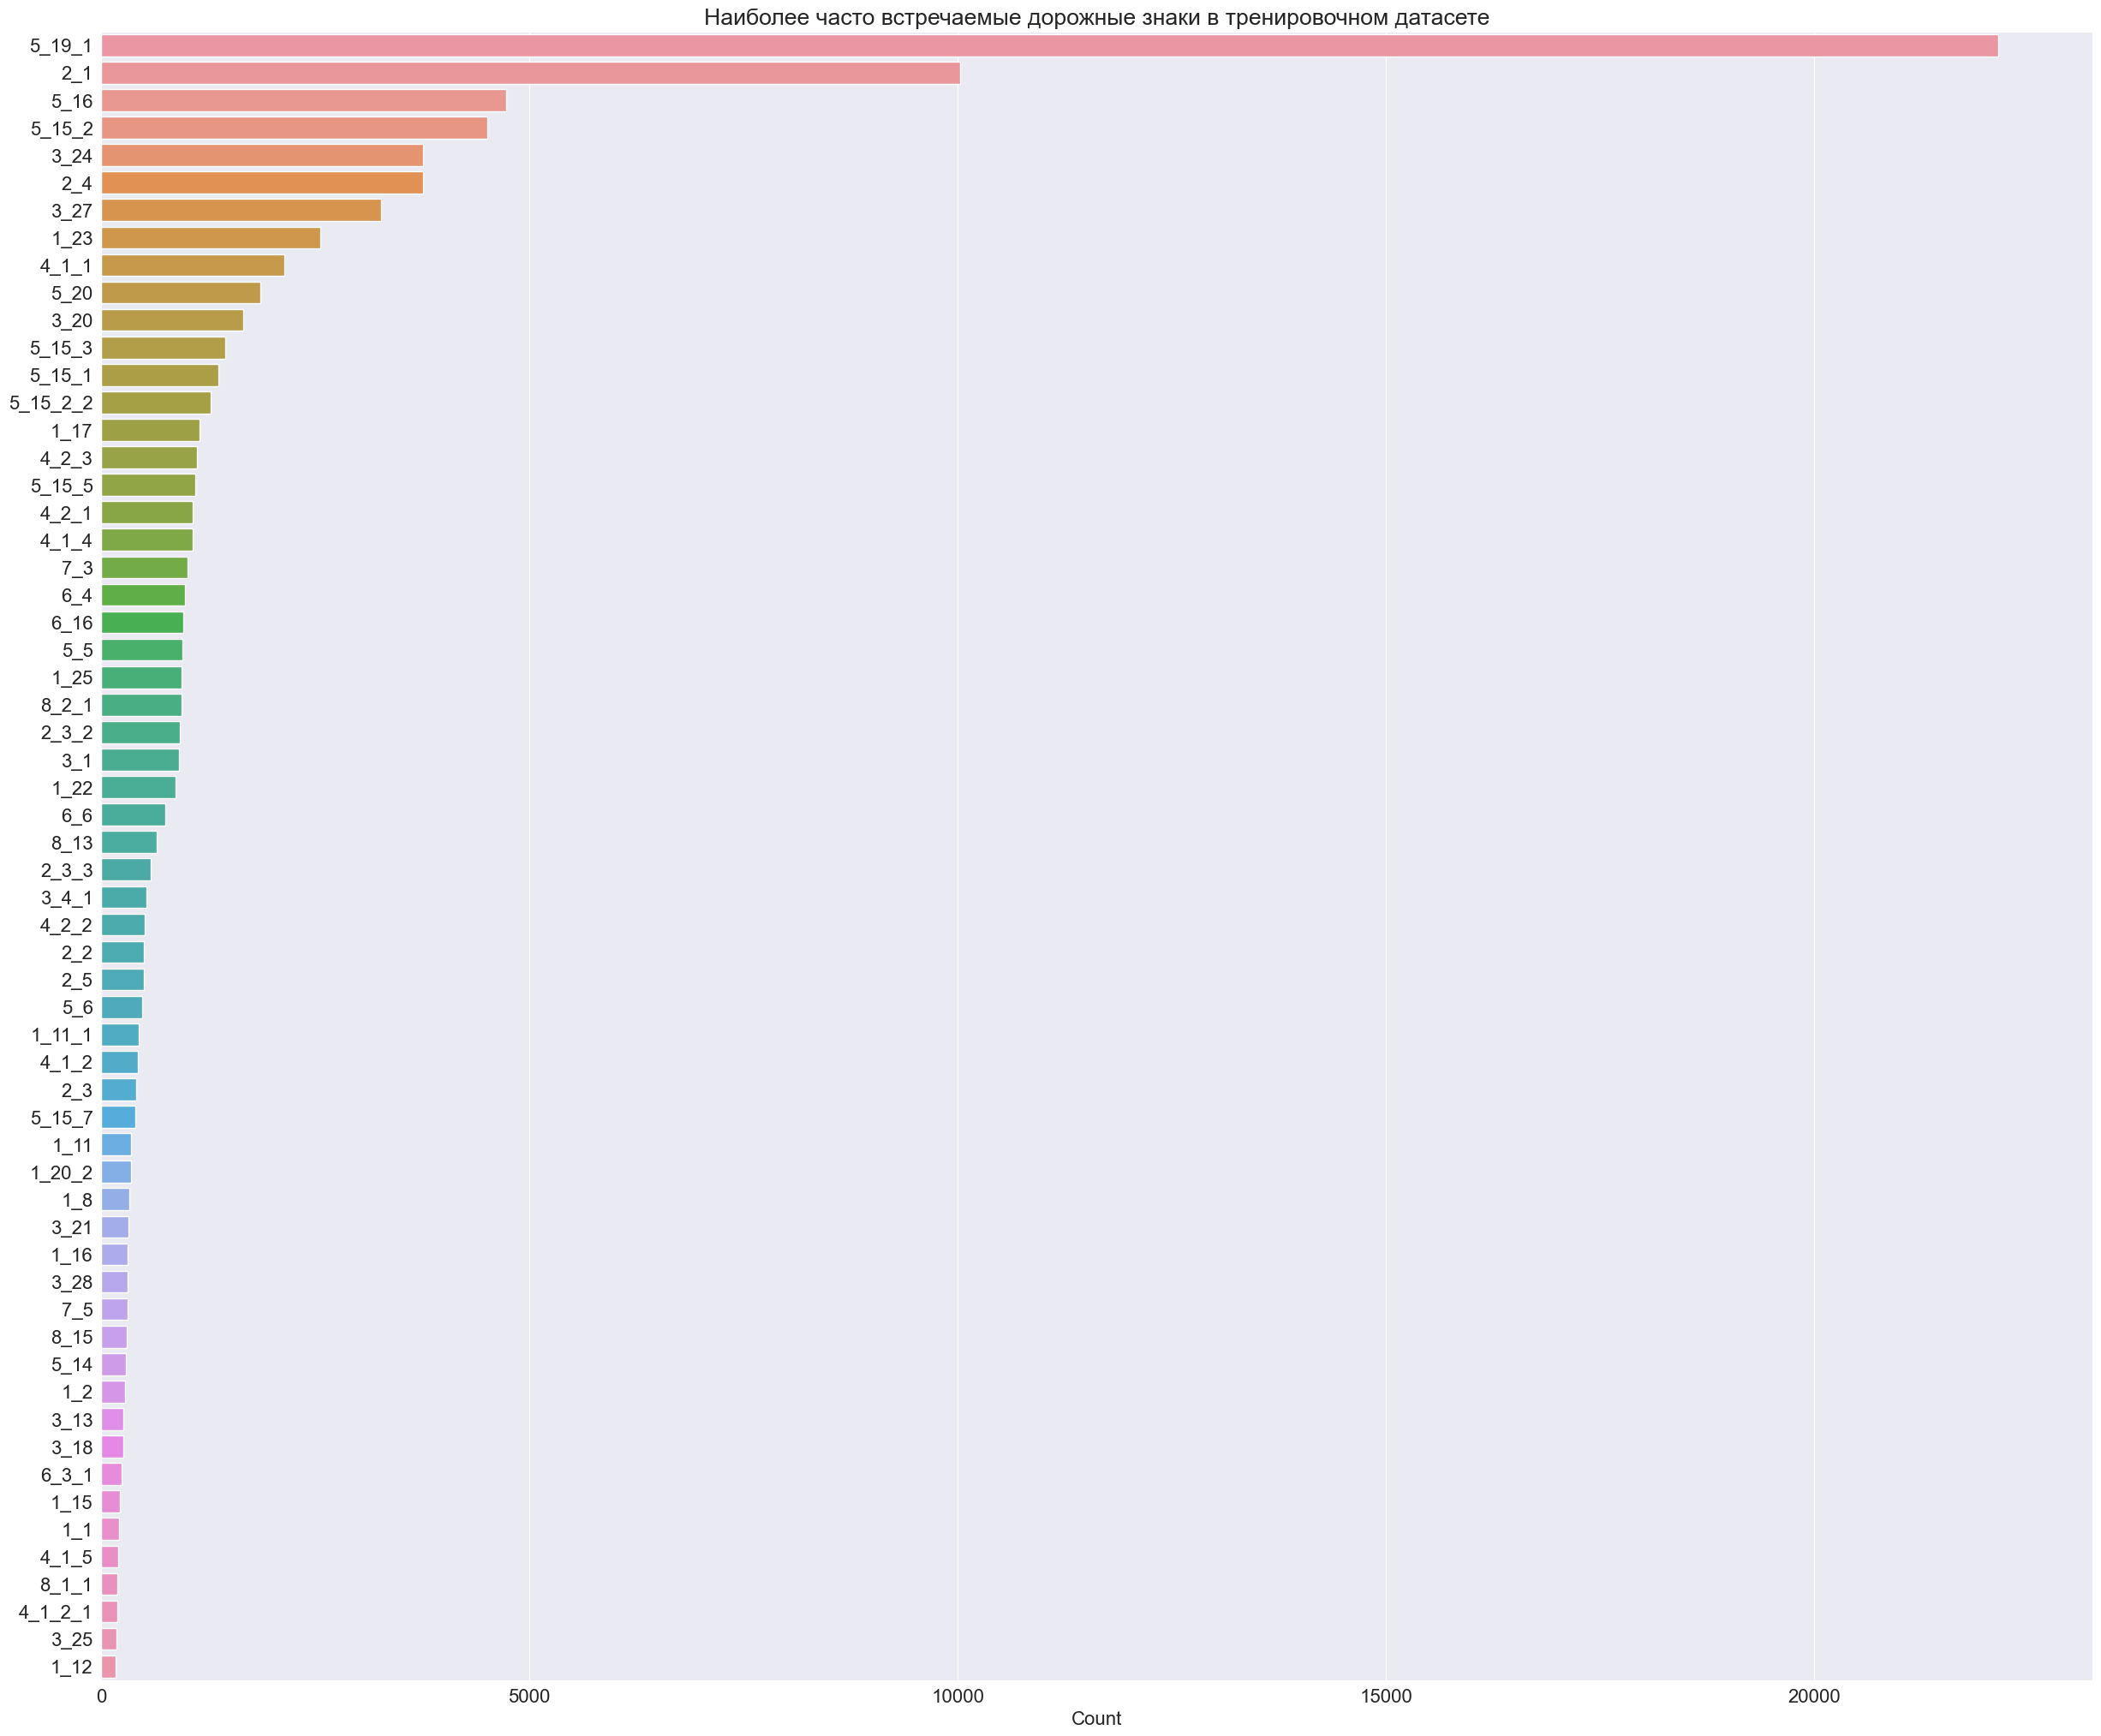

In [8]:
top_cats_counts = train_labels_df['label'].value_counts()[0:60]
plt.figure(figsize=(30, 25))
plt.xlabel('Count')
ax = sns.barplot(x=top_cats_counts.values, y=top_cats_counts.index).set(title='Наиболее часто встречаемые дорожные знаки в тренировочном датасете')

![](img/5_19_1.png)![](img/2_4.png)![](img/2_1.png)![](img/3_24.png)
![](img/1_23.png)![](img/3_27.png)![](img/5_15_2.png)![](img/5_20.png)

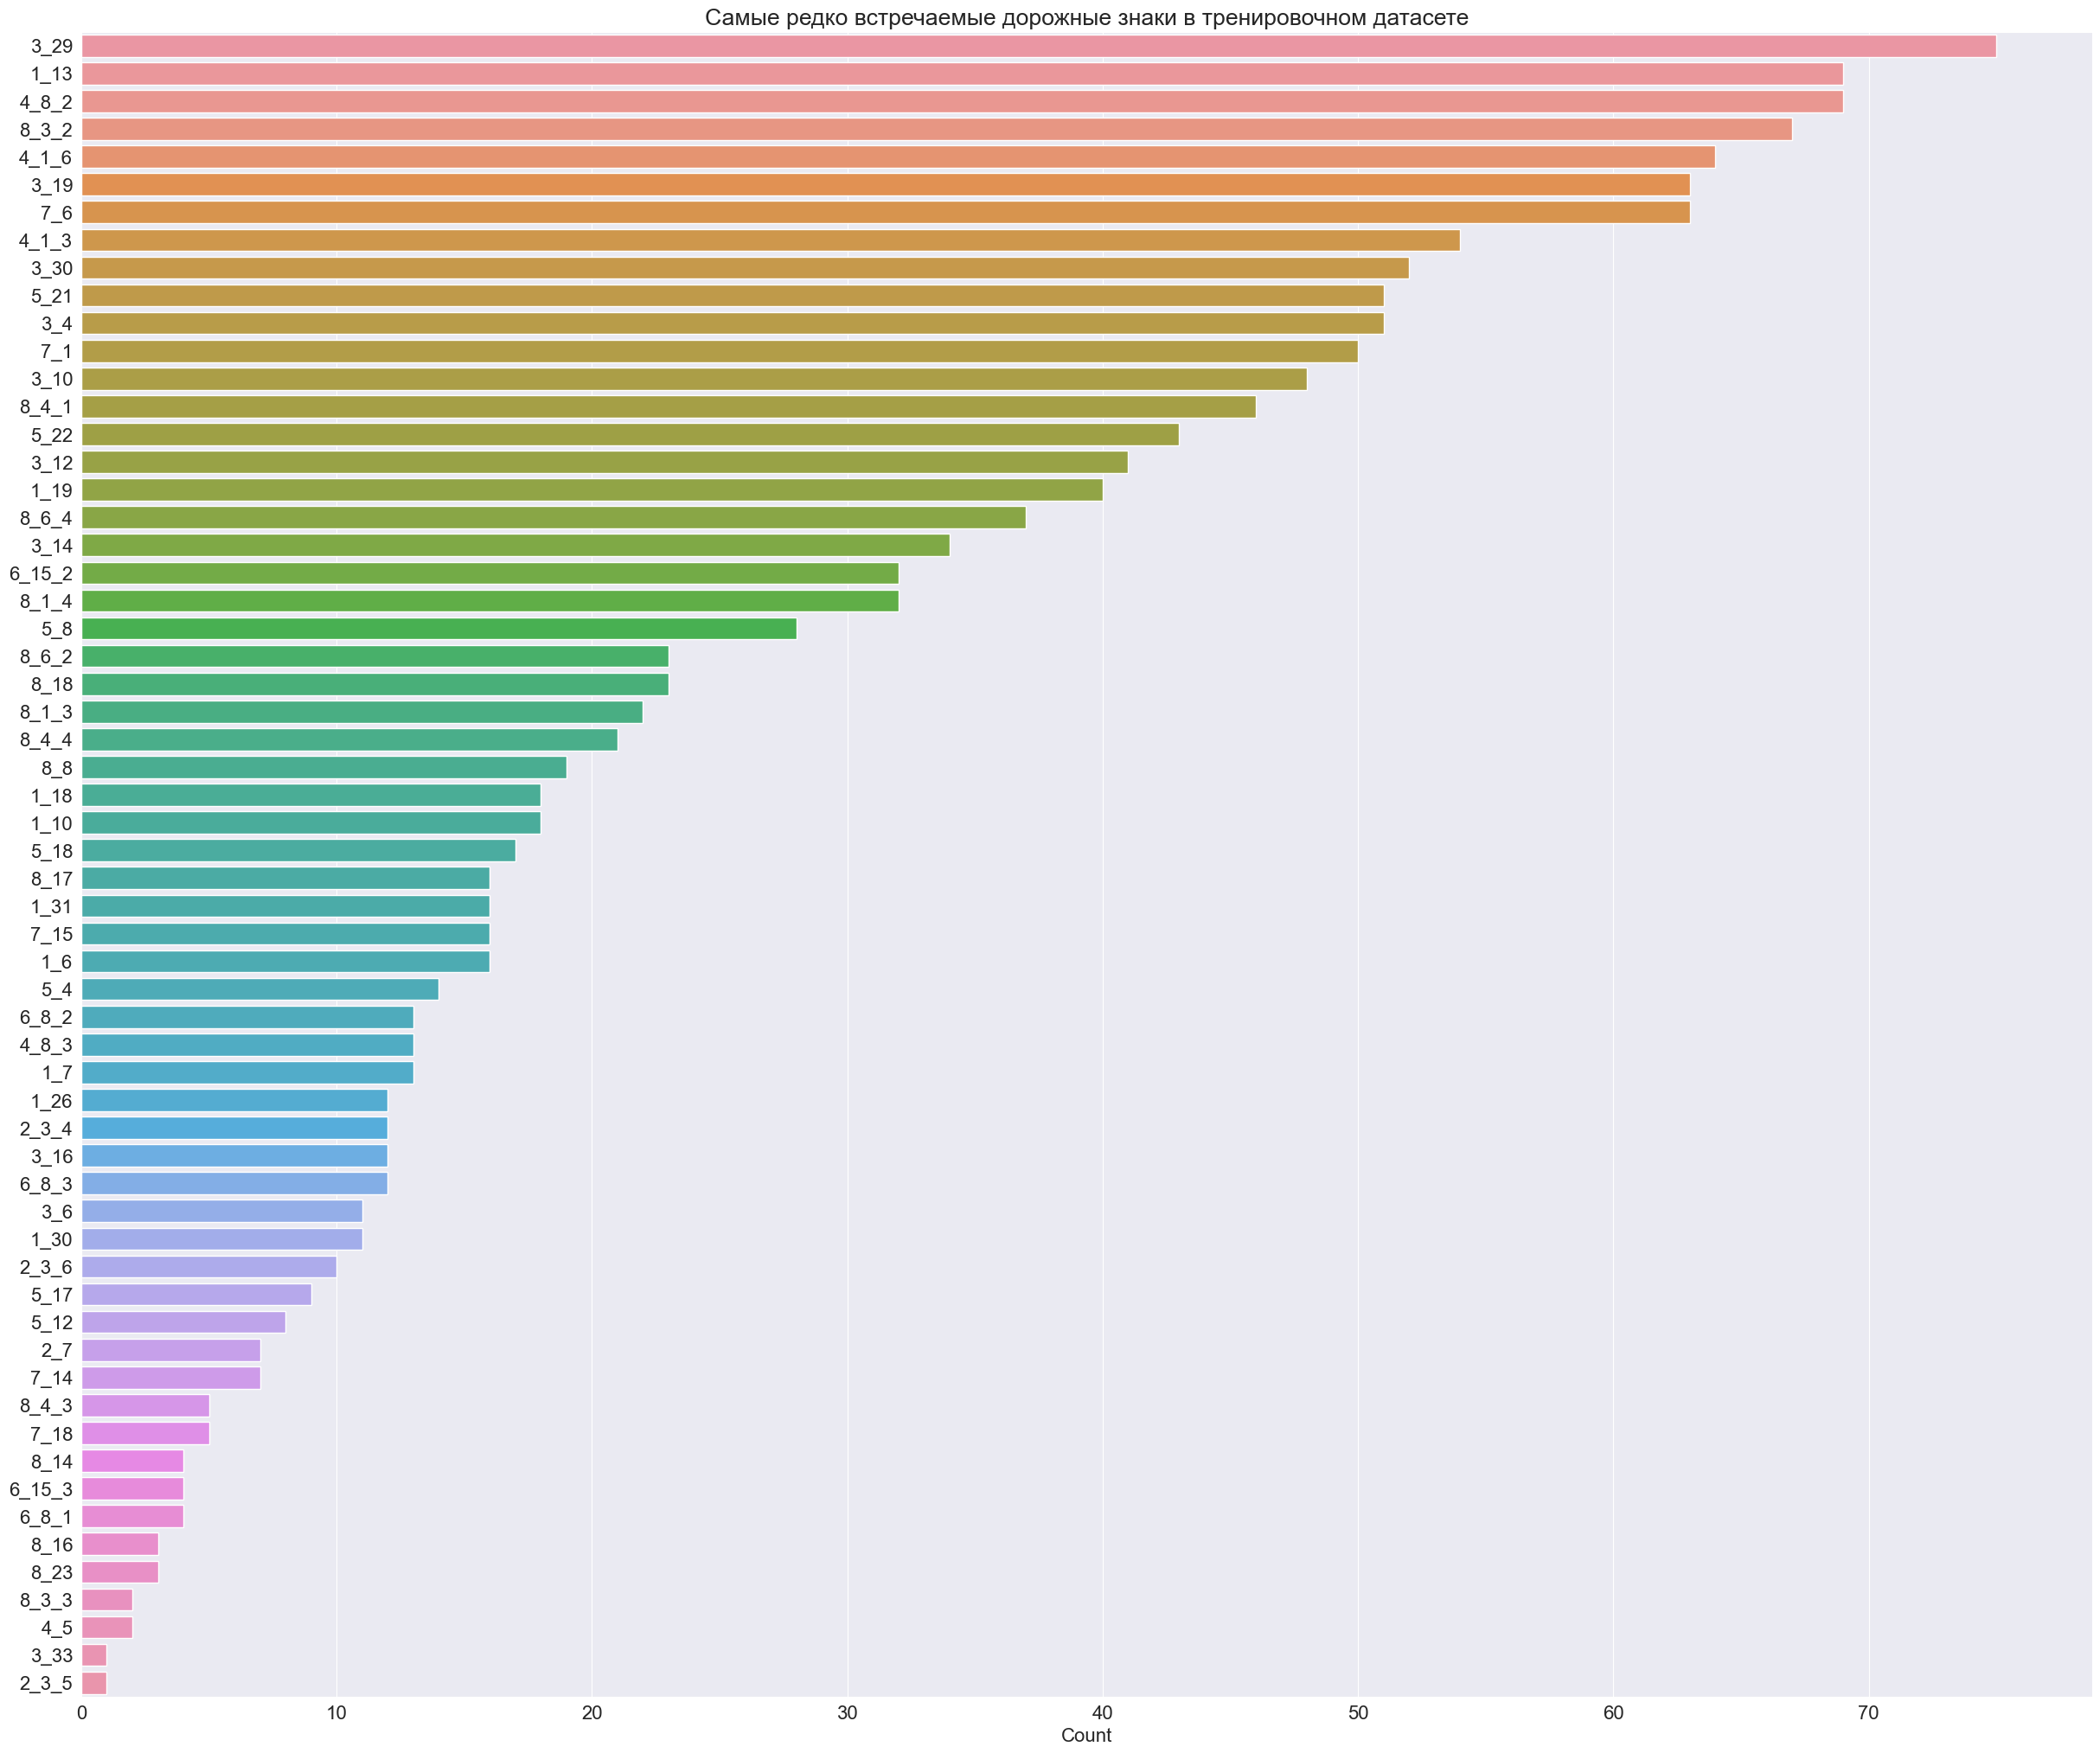

In [9]:
last_cat_counts = train_labels_df['label'].value_counts()[-60:]
plt.figure(figsize=(30, 25))
plt.xlabel('Count')
ax = sns.barplot(x=last_cat_counts.values, y=last_cat_counts.index).set(title='Самые редко встречаемые дорожные знаки в тренировочном датасете')

In [10]:
train_labels_df['area'].describe()

count    95492.000000
mean      2022.286799
std       3213.351447
min        256.000000
25%        572.000000
50%        992.000000
75%       2070.000000
max      84560.000000
Name: area, dtype: float64

<AxesSubplot: xlabel='area', ylabel='Count'>

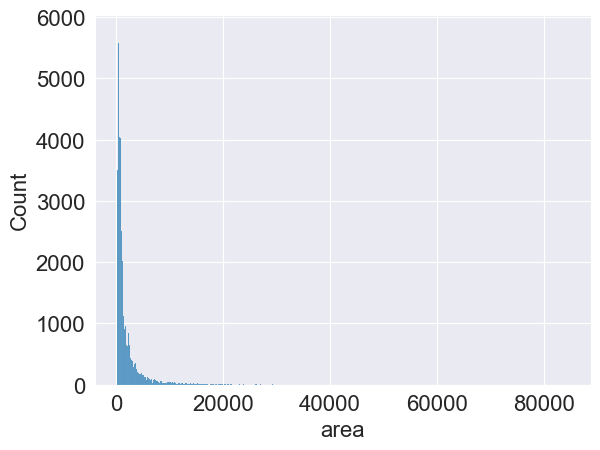

In [11]:
sns.histplot(train_labels_df['area'])

In [12]:
train_labels_df = rtsd.filter_anno_by_area(train_labels_df)
val_labels_df = rtsd.filter_anno_by_area(val_labels_df)

In [13]:
top_cats = list(top_cats_counts.index)

train_labels_df = rtsd.filter_anno_by_label(train_labels_df, top_cats)
val_labels_df = rtsd.filter_anno_by_label(val_labels_df, top_cats)

print(train_labels_df.shape)
print(val_labels_df.shape)

(36927, 11)
(3419, 11)


In [14]:
train_labels_df = rtsd.remove_single_sign_annotation(train_labels_df)
val_labels_df = rtsd.remove_single_sign_annotation(val_labels_df)

In [15]:
print(train_labels_df.shape)
print(val_labels_df.shape)

(30513, 11)
(2841, 11)


In [16]:
top_cats_counts = train_labels_df['label'].value_counts()
classes = list(top_cats_counts.index[0:50])
classes = list(set(val_labels_df['label'].unique()).intersection(classes))

In [17]:
train_labels_df = rtsd.filter_anno_by_label(train_labels_df, classes)
val_labels_df = rtsd.filter_anno_by_label(val_labels_df, classes)

In [18]:
print("Количество аннотаций в тренировочном датасете: ", train_labels_df.shape[0])
print("Количество аннотаций в валидационном датасете: ", val_labels_df.shape[0])

print("Количество изображений в тренировочном датасете: ", len(train_labels_df['img_name'].unique()))
print("Количество изображений в тренировочном датасете: ", len(val_labels_df['img_name'].unique()))


Количество аннотаций в тренировочном датасете:  29565
Количество аннотаций в валидационном датасете:  2785
Количество изображений в тренировочном датасете:  18497
Количество изображений в тренировочном датасете:  1718


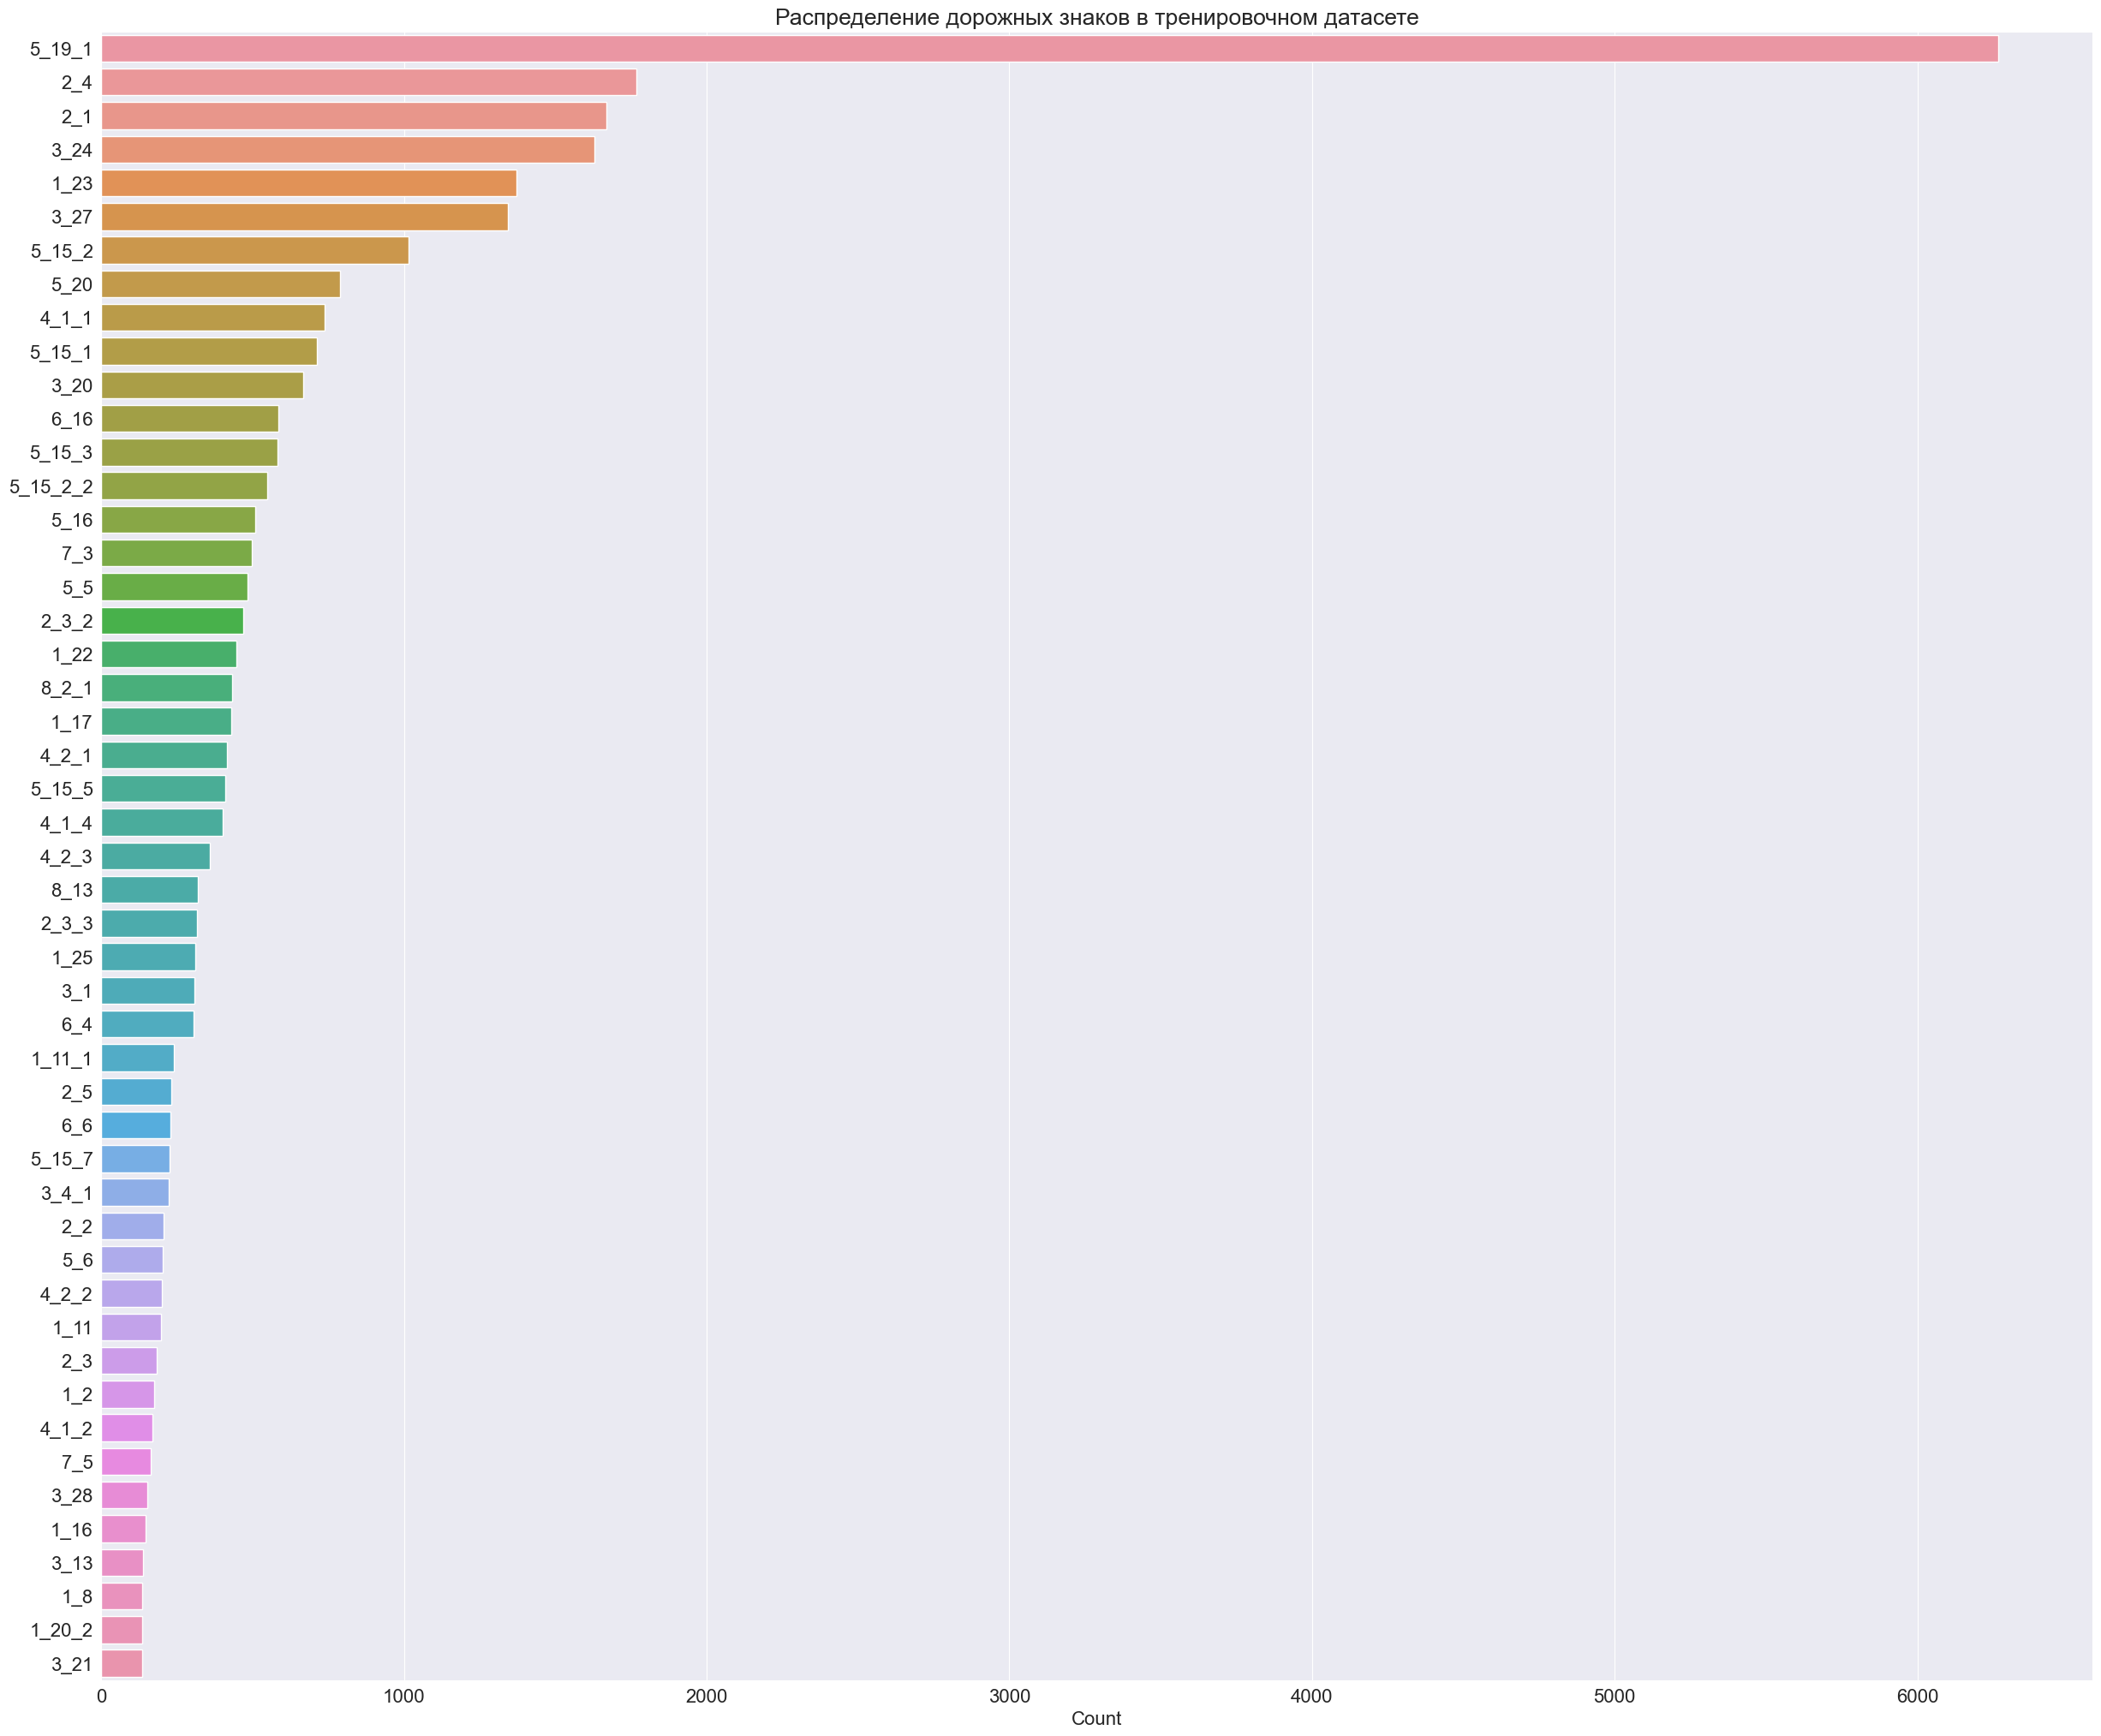

In [19]:
cat_counts = train_labels_df['label'].value_counts()
plt.figure(figsize=(30, 25))
plt.xlabel('Count')
ax = sns.barplot(x=cat_counts.values, y=cat_counts.index).set(title='Распределение дорожных знаков в тренировочном датасете')

In [20]:
train_labels_df['label'].value_counts()

5_19_1      6266
2_4         1769
2_1         1669
3_24        1630
1_23        1372
3_27        1342
5_15_2      1014
5_20         788
4_1_1        737
5_15_1       712
3_20         666
6_16         585
5_15_3       581
5_15_2_2     547
5_16         507
7_3          497
5_5          482
2_3_2        470
1_22         447
8_2_1        433
1_17         430
4_2_1        415
5_15_5       410
4_1_4        402
4_2_3        357
8_13         319
2_3_3        315
1_25         310
3_1          307
6_4          304
1_11_1       239
2_5          230
6_6          229
5_15_7       225
3_4_1        222
2_2          207
5_6          204
4_2_2        199
1_11         197
2_3          184
1_2          175
4_1_2        168
7_5          163
3_28         152
1_16         147
3_13         137
1_8          136
1_20_2       134
3_21         134
Name: label, dtype: int64

In [21]:
val_labels_df['label'].value_counts()

5_19_1      577
2_1         180
2_4         159
3_24        139
1_23        124
3_27        119
5_15_2      112
4_1_1        81
6_16         69
5_20         65
5_15_1       63
3_20         60
5_15_3       59
5_15_2_2     50
5_16         48
1_22         46
4_2_1        46
7_3          45
4_1_4        45
2_3_2        42
5_5          41
1_17         38
8_2_1        36
5_15_5       36
6_4          32
1_25         32
5_15_7       30
5_6          29
3_1          29
2_3_3        26
2_5          26
2_2          22
8_13         21
4_1_2        21
3_4_1        21
6_6          20
1_11_1       20
1_11         20
1_2          19
4_2_2        18
3_21         18
4_2_3        18
1_20_2       16
3_28         16
7_5          14
3_13         10
2_3          10
1_16          9
1_8           8
Name: label, dtype: int64

In [22]:
print(len(classes))

49


In [23]:
with open('classes.txt', 'w') as f:
    for cl in classes:
        f.write(f"{cl}\n")

In [24]:
import json
with open('classes_list.txt', 'w') as f:
    classes_str = json.dumps(classes)
    f.write(classes_str)

In [28]:
def convert_labels(row):
    x = row['x']
    y = row['y']
    w = row['w']
    h = row['h']
    W = row['width']
    H = row['height']
    coco_bbox = (int(x), int(y), int(w), int(h))
    return pbx.convert_bbox(coco_bbox, from_type="coco", to_type="yolo", image_size=(W, H))

df_pplot =  pd.DataFrame(train_labels_df.apply(lambda row: convert_labels(row), axis=1).tolist(), index= train_labels_df.index, columns=['x', 'y', 'w', 'h'])

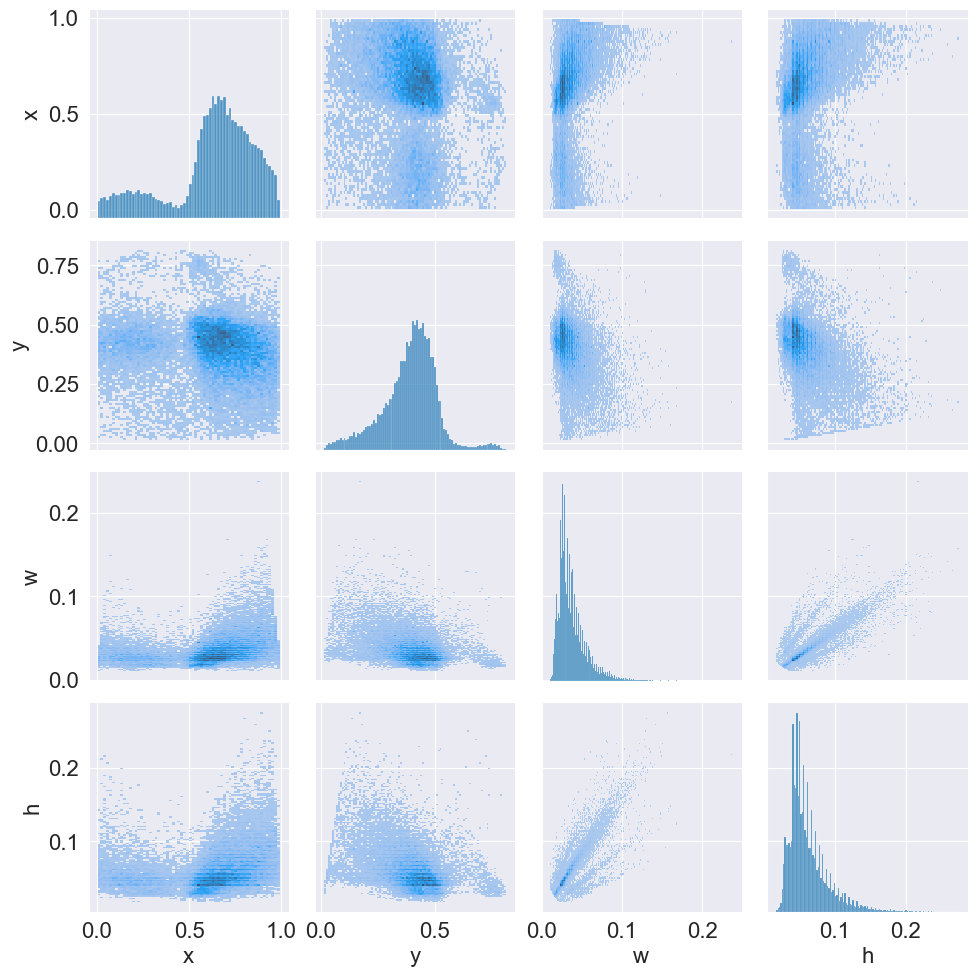

In [29]:
sns.pairplot(df_pplot, kind="hist");